In [203]:
# Import libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import numpy as np

In [204]:
#Load the Gapminder Dataset
df = px.data.gapminder()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


Using Plotly express as px, source the data using the command px.data.gapminder() and save it
into a dataframe. Based on the data, map the following information with the appropriate
geographical plot. Map out:
1. The mean life expectancy of all the Asian countries according to the data.

In [205]:
# Select all the Asian Countries from the dataframe
Asian_Countries = df[df['continent'] == 'Asia']
Asian_Countries

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1675,"Yemen, Rep.",Asia,1987,52.922,11219340,1971.741538,YEM,887
1676,"Yemen, Rep.",Asia,1992,55.599,13367997,1879.496673,YEM,887
1677,"Yemen, Rep.",Asia,1997,58.020,15826497,2117.484526,YEM,887
1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827,YEM,887


In [206]:
# calculate mean life expectancy of all the Asian countries
avg_life_exp_asia = Asian_Countries['lifeExp'].mean()

# print the mean life expectancy of all the Asian countries
print("The average life expectancy of all the Asian countries is:", avg_life_exp_asia)

The average life expectancy of all the Asian countries is: 60.064903232323175


In [207]:
# Aggregating mean life expectancy of Asian Countries
mean_life_exp_asia =Asian_Countries.groupby(['country'])['lifeExp'].mean().reset_index().sort_values('country', ascending=True)

In [208]:
mean_life_exp_asia

,country,lifeExp
0,Afghanistan,37.478833
1,Bahrain,65.605667
2,Bangladesh,49.834083
3,Cambodia,47.902750
4,China,61.785140
5,"Hong Kong, China",73.492833
6,India,53.166083
7,Indonesia,54.335750
8,Iran,58.636583
9,Iraq,56.581750


In [209]:
# Chloropleth map of the mean life expectancy of Asian countries
fig_1 = go.Figure(data=go.Choropleth(
    locations = mean_life_exp_asia['country'],
    locationmode = 'country names',
    z = mean_life_exp_asia['lifeExp'],
    colorscale = 'Reds'

))
fig_1.update_layout(
    title = 'Choropleth Map of the Mean Life Expectancy of Asian Countries'
)

fig_1.show()

# Image of fig_1 Chloropleth Plot
http://localhost:8888/view/ADS_REV_code/ASSIGNMENT_6/newplot.png

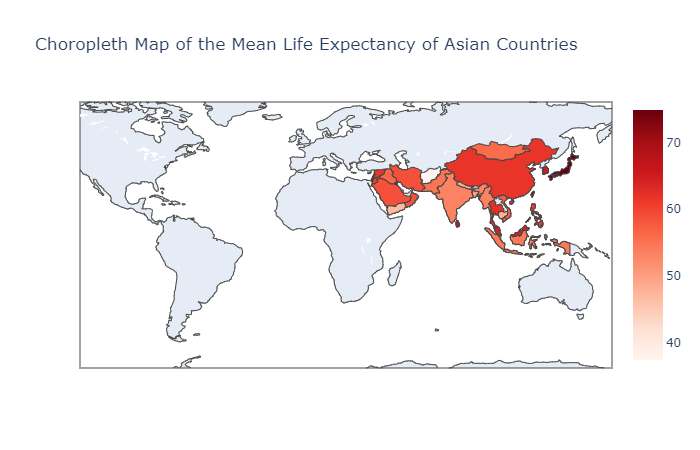

In [210]:
# Japan has the highest mean life Expectancy of all the Asian countries(74.8), folllowed closely by Israel(73.6) and Taiwan(70.3)
# Malaysia, Kuwait, South Korea, Thailand, Srilanka, Philippines follow with LifeExp >60
# India, Pakistan, Myanmar, Indonesia have Life Exp > 50
# Afghanistan has the lowest mean life expectancy of 37.4 years


2. Deviation in GDP of each country in Europe and South America.

In [211]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

In [212]:
# Getting all values under the continent column
print(df['continent'])

0         Asia
1         Asia
2         Asia
3         Asia
4         Asia
         ...  
1699    Africa
1700    Africa
1701    Africa
1702    Africa
1703    Africa
Name: continent, Length: 1704, dtype: object


In [213]:
# Getting all the unique values of the column continent
print(df['continent'].unique())

['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']


In [214]:
# Select all the American Countries from the dataframe
Americas = df[df['continent'] == 'Americas']
Americas

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
48,Argentina,Americas,1952,62.485,17876956,5911.315053,ARG,32
49,Argentina,Americas,1957,64.399,19610538,6856.856212,ARG,32
50,Argentina,Americas,1962,65.142,21283783,7133.166023,ARG,32
51,Argentina,Americas,1967,65.634,22934225,8052.953021,ARG,32
52,Argentina,Americas,1972,67.065,24779799,9443.038526,ARG,32
...,...,...,...,...,...,...,...,...
1639,Venezuela,Americas,1987,70.190,17910182,9883.584648,VEN,862
1640,Venezuela,Americas,1992,71.150,20265563,10733.926310,VEN,862
1641,Venezuela,Americas,1997,72.146,22374398,10165.495180,VEN,862
1642,Venezuela,Americas,2002,72.766,24287670,8605.047831,VEN,862


In [215]:
Americas.describe()

,year,lifeExp,pop,gdpPercap,iso_num
count,300.000000,300.000000,3.000000e+02,300.000000,300.000000
mean,1979.500000,64.658737,2.450479e+07,7136.110356,393.720000
std,17.289102,9.345088,5.097943e+07,6396.764112,261.727452
min,1952.000000,37.579000,6.628500e+05,1201.637154,32.000000
25%,1965.750000,58.410000,2.962359e+06,3427.779072,188.000000
50%,1979.500000,67.048000,6.227510e+06,5465.509853,332.000000
75%,1993.250000,71.699500,1.834031e+07,7830.210416,600.000000
max,2007.000000,80.653000,3.011399e+08,42951.653090,862.000000


In [216]:
# Grouping the Americas by the Standard Deviation of GDP per capita
gdpPercap_Americas =Americas.groupby(['country'])['gdpPercap'].std().reset_index().sort_values('country', ascending=True)

In [217]:
gdpPercap_Americas 

,country,gdpPercap
0,Argentina,1862.583151
1,Bolivia,524.748706
2,Brazil,2436.453754
3,Canada,8210.112789
4,Chile,3026.194023
5,Colombia,1652.931466
6,Costa Rica,2018.532901
7,Cuba,1127.781072
8,Dominican Republic,1373.906233
9,Ecuador,1435.152282


In [218]:
# Chloropleth map of the GDP Per capita Standard Deviation - Americas
fig_2 = go.Figure(data=go.Choropleth(
    locations = gdpPercap_Americas['country'],
    locationmode = 'country names',
    z = gdpPercap_Americas['gdpPercap'],
    colorscale = 'Reds'

))
fig_2.update_layout(
    title = 'Choropleth Map of the Standard Deviation of GDP per capita - Americas'
)

fig_2.show()

# Image of fig_2
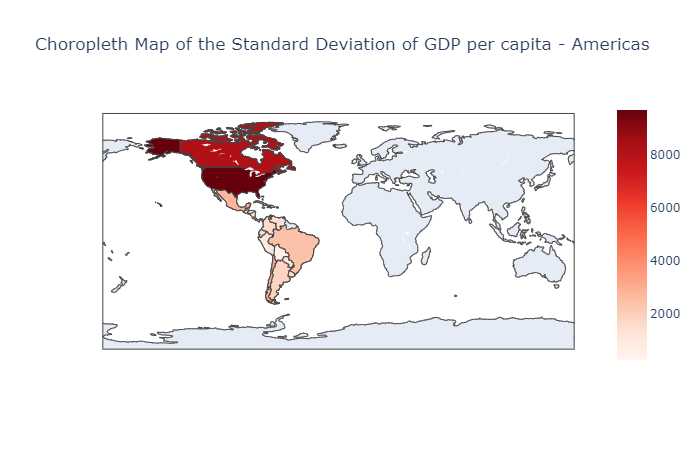

In [219]:
# The North American countries have higher std deviation of GDP per capita than South American Countries
# USA has std dev= $9695 followed by Canada $8210
# Chile has the highest std deviation among South American countries, followed by Brazil and Costa Rica
# Honduras,Bolivia, El Savador, Paraguay, Nicaragua have the lowest std dev from the data

In [220]:
# Select all the European Countries from the dataframe
Europe = df[df['continent'] == 'Europe']
Europe

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
12,Albania,Europe,1952,55.230,1282697,1601.056136,ALB,8
13,Albania,Europe,1957,59.280,1476505,1942.284244,ALB,8
14,Albania,Europe,1962,64.820,1728137,2312.888958,ALB,8
15,Albania,Europe,1967,66.220,1984060,2760.196931,ALB,8
16,Albania,Europe,1972,67.690,2263554,3313.422188,ALB,8
...,...,...,...,...,...,...,...,...
1603,United Kingdom,Europe,1987,75.007,56981620,21664.787670,GBR,826
1604,United Kingdom,Europe,1992,76.420,57866349,22705.092540,GBR,826
1605,United Kingdom,Europe,1997,77.218,58808266,26074.531360,GBR,826
1606,United Kingdom,Europe,2002,78.471,59912431,29478.999190,GBR,826


In [221]:
# Grouping the European countries by the Standard Deviation of GDP per capita
gdpPercap_Europe =Europe.groupby(['country'])['gdpPercap'].std().reset_index().sort_values('country', ascending=True)

In [222]:
gdpPercap_Europe

,country,gdpPercap
0,Albania,1192.351513
1,Austria,9655.281488
2,Belgium,8391.186269
3,Bosnia and Herzegovina,1950.522347
4,Bulgaria,2351.963619
5,Croatia,3784.408663
6,Czech Republic,4361.646747
7,Denmark,8305.077866
8,Finland,8360.170674
9,France,7903.234227


In [196]:
# Chloropleth map of the GDP Per capita Standard Deviation - Europe
fig_3 = go.Figure(data=go.Choropleth(
    locations = gdpPercap_Europe['country'],
    locationmode = 'country names',
    z = gdpPercap_Europe['gdpPercap'],
    colorscale = 'Reds'

))
fig_3.update_layout(
    title = 'Choropleth Map of the Standard Deviation of GDP per capita - Europe'
)

fig_3.show()

# Image of fig_3
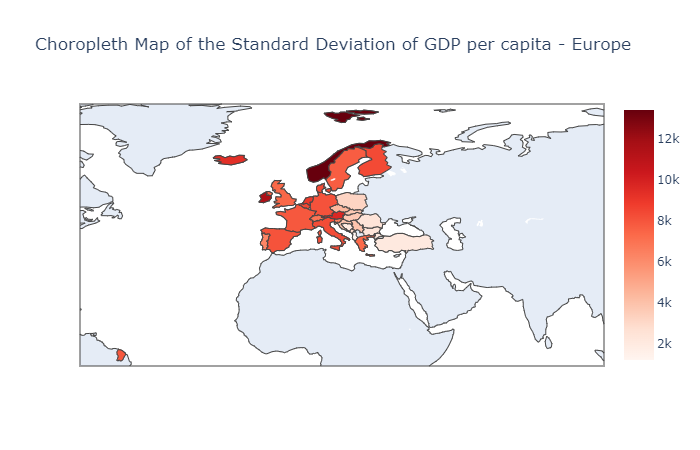

In [197]:
# Norway has the highest std dev , followed by Ireland
# Western Europe has higher std dev values than Eastern Europe from the data. 
# However, data on Russia which is the largest country in the world and part of Eastern Europe is not in the dataset. 

3. The change in population of each African country in the last 3 decades

In [198]:
# filter the dataset to only include African countries
Africa = df[df['continent'] == 'Africa']

Africa

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
24,Algeria,Africa,1952,43.077,9279525,2449.008185,DZA,12
25,Algeria,Africa,1957,45.685,10270856,3013.976023,DZA,12
26,Algeria,Africa,1962,48.303,11000948,2550.816880,DZA,12
27,Algeria,Africa,1967,51.407,12760499,3246.991771,DZA,12
28,Algeria,Africa,1972,54.518,14760787,4182.663766,DZA,12
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [199]:
# Line plot the change in population of each African country in the last 3 decades
fig_4 = px.line(recent, x='year', y='pop', color='country', title='Change in Population of African Countries (1990-2020)')
fig_4.show()

# fig_4 Line Plot 
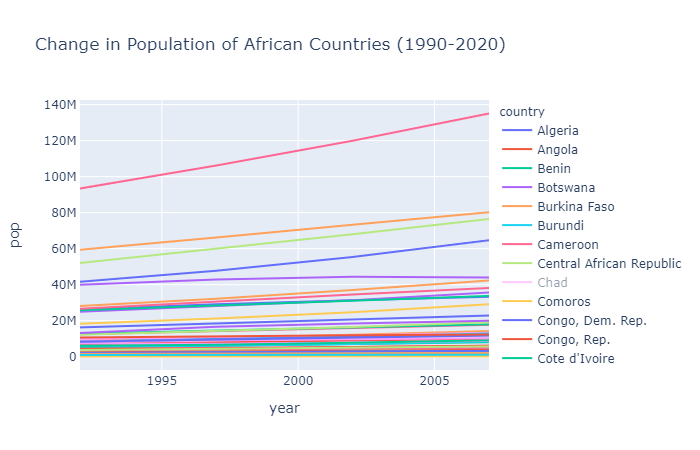

In [200]:
# filter the dataset to only include data from the last 3 decades
recent = Africa[Africa['year'] >= 1990]
recent

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
32,Algeria,Africa,1992,67.744,26298373,5023.216647,DZA,12
33,Algeria,Africa,1997,69.152,29072015,4797.295051,DZA,12
34,Algeria,Africa,2002,70.994,31287142,5288.040382,DZA,12
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
44,Angola,Africa,1992,40.647,8735988,2627.845685,AGO,24
...,...,...,...,...,...,...,...,...
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


3. The change in population of each African country in the last 3 decades.

In [201]:
# The change in population of each African country in the last 3 decades.
# https://stackoverflow.com/questions/67992704/plotly-choropleth-map-not-showing-up

import plotly.express as px
hover_data_cols_df = ['country']
fig = px.choropleth(recent,
                    locations="country",
                    locationmode='country names',
                    color='pop', 
                    hover_name = 'country',
                    hover_data = hover_data_cols_df,
                    color_continuous_scale = px.colors.sequential.Blues,
                    animation_frame="year"
               )
fig.update_layout (title_text = 'Chloropleth Map Showing the Change in Population of each African Country in the Last 3 Decades.', title_x = 0.5,);

fig.show()

# Image of fig_5
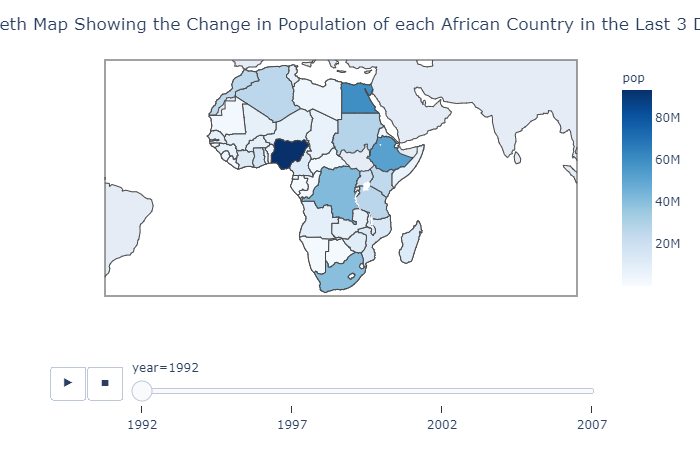

In [223]:
# Population has been increasing over the last three decades in Africa
# The Most Populous African Countries over the period include Nigeria, Ethiopia, Egypt and the  Democratic Republic of the Congo